<center> <h1>Identifying Age-Related Conditions</h1><a name="top"></a>

<h3> Andrés G. Romero Alarcón </h3>

TU Dortmund | Data Mining Cup 
</center>

***

*Notebook Proposal for solving the Kaggle Competition [ICR - Identifying Age-Related Conditions](https://www.kaggle.com/competitions/icr-identify-age-related-conditions/submissions) posted by **InVitro Cell Research**: Use Machine Learning to detect conditions with measurements of anonymous characteristics.*




### Table of Contents

0. [Libraries](#0-libraries)
1. [Data load](#1-data-load)
2. [E.D.A.](#2-exploratory-data-analysis)
    1. [General Statistics](#21-general-statistics)
    2. [Unique Values](#22-unique-values)
    3. [Missing Values](#23-missing-values)
    4. [Imputations](#24-imputation-of-missing-entries)
3. [Loss Analysis](#3-loss-analysis)
4. [ML Models](#4-ml-models)
    1. [Decision Trees](#41-decision-trees)
    2. [Random Forests](#42-random-forests)
    3. [LightGBM](#43-lightgbm)


### 0. Libraries <a name = "libraries"></a>

In [1]:

# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

# Models
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm

# Additional options
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

[Back to top](#table-of-contents)

### 1. Data load <a name = "#data_load"></a>

In [2]:
dir_path = "/Users/romeroandres/Documents/6. TUD - SoSe 2023/Data Mining Cup/ICR/Data/"
sub_path = "/Users/romeroandres/Documents/6. TUD - SoSe 2023/Data Mining Cup/ICR/Predictions/"

train = pd.read_csv(dir_path+"train.csv", index_col="Id")
test = pd.read_csv(dir_path+"test.csv", index_col="Id")
greeks = pd.read_csv(dir_path+"greeks.csv", index_col="Id")
train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.238680,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.238680,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.238680,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.238680,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,21.1860,167.877117,27.287375,365.516874,257.432377,41.368691,0.691257,55.163024,4.780452,0.013930,1.177525,0.698250,40.159779,1.070298,7.030640,21.75904,355.930925,0.238680,0.445479,176.977590,90.91832,27.957928,0.005518,2.41906,32.508604,8.015112,1.354416,495.086300,0.003042,A,51.618996,78.526968,65.821872,29.708112,0.296850,17167.209610,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,27.1887,285.628059,344.644105,505.006814,257.432377,61.910576,0.772304,85.233928,6.682597,0.038208,1.050225

[Back to top](#table-of-contents)

### 2. Exploratory Data Analysis

#### 2.1. General Statistics

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 000ff2bfdfe9 to ffcca4ded3bb
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    

Is the dataset balanced?

In [4]:
train.Class.value_counts()

0    509
1    108
Name: Class, dtype: int64

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 00eed32682bb to 046e85c7cc7f
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      5 non-null      float64
 1   AF      5 non-null      float64
 2   AH      5 non-null      float64
 3   AM      5 non-null      float64
 4   AR      5 non-null      float64
 5   AX      5 non-null      float64
 6   AY      5 non-null      float64
 7   AZ      5 non-null      float64
 8   BC      5 non-null      float64
 9   BD      5 non-null      float64
 10  BN      5 non-null      float64
 11  BP      5 non-null      float64
 12  BQ      5 non-null      float64
 13  BR      5 non-null      float64
 14  BZ      5 non-null      float64
 15  CB      5 non-null      float64
 16  CC      5 non-null      float64
 17  CD      5 non-null      float64
 18  CF      5 non-null      float64
 19  CH      5 non-null      float64
 20  CL      5 non-null      float64
 21  CR      5 non-null      fl

In [6]:
test.EJ

Id
00eed32682bb    A
010ebe33f668    A
02fa521e1838    A
040e15f562a2    A
046e85c7cc7f    A
Name: EJ, dtype: object

In [7]:
train.columns[:-1] == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [8]:
train.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

As some column names have empty spaces (" "), we will rename them:

In [9]:
train.rename(columns={'BD ':'BD','CD ':'CD', 'CW ':'CW', 'FD ':'FD'}, inplace=True)
test.rename(columns={'BD ':'BD','CD ':'CD', 'CW ':'CW', 'FD ':'FD'}, inplace=True)
train.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

As column EJ has either values A or B, it is mapped to 0 and 1 correspondingly so we will end up with just numeric entries in the datasets.

In [10]:
# Replacing in col EJ letter A for 0 and B for 1
train = train.replace({"A":0,"B":1})
test = test.replace({"A":0,"B":1})

So all features are now of type **_float64_** but ``EJ`` and ``Class`` (only in the training dataset) which are left as **_int64_**.

[Back to top](#top)

#### 2.2. Unique Values <a name = "unique"></a>

In [11]:
# Function counting unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [12]:
unique_values(train)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Total,617,617,617,617,617,617,617,617,617,617,617,617,557,617,617,615,614,617,617,617,617,617,617,617,617,617,617,617,617,617,617,617,616,617,617,617,617,617,617,617,557,617,617,616,617,617,617,616,617,615,617,617,617,617,617,616,617
Uniques,217,599,227,605,130,427,148,484,259,617,53,612,515,566,115,553,602,584,586,135,123,595,576,307,426,611,616,137,191,571,604,576,253,39,590,439,513,610,127,2,311,275,455,600,337,615,498,388,435,161,560,264,611,596,615,355,2


[Text(0.5, 1.0, 'Distribution of unique values'),
 Text(0.5, 0, 'Unique values')]

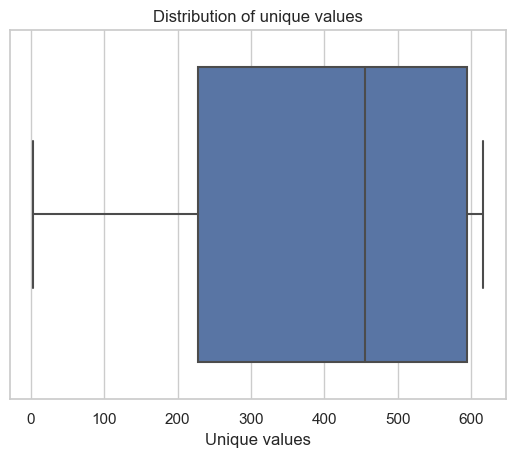

In [13]:
sns.boxplot(x=unique_values(train).iloc[1]).set(title = "Distribution of unique values", xlabel = "Unique values")


In [14]:
unique_values(train).iloc[1].describe()

count     57.000000
mean     403.824561
std      202.856047
min        2.000000
25%      227.000000
50%      455.000000
75%      595.000000
max      617.000000
Name: Uniques, dtype: float64

In [15]:
unique_values(train).iloc[1].sort_values()

Class      2
EJ         2
DV        39
BN        53
BZ       115
CL       123
EH       127
AR       130
CH       135
DF       137
AY       148
FS       161
DH       191
AB       217
AH       227
DU       253
BC       259
GE       264
EP       275
CU       307
EL       311
FD       337
GL       355
FL       388
CW       426
AX       427
FR       435
EB       439
EU       455
AZ       484
FI       498
EE       513
BQ       515
CB       553
GB       560
BR       566
DI       571
CS       576
DN       576
CD       584
CF       586
DY       590
CR       595
GH       596
AF       599
FC       600
CC       602
DL       604
AM       605
EG       610
DA       611
GF       611
BP       612
GI       615
FE       615
DE       616
BD       617
Name: Uniques, dtype: int64

In [16]:
unique_values(test)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
Total,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Uniques,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


[Back to top](#top)

#### 2.3. Missing Values <a name = "missing"></a>

In [17]:
train.isna().sum().sort_values(ascending=False)[0:10]

EL    60
BQ    60
CC     3
CB     2
FS     2
FL     1
FC     1
DU     1
GL     1
EE     0
dtype: int64

In [18]:
test.isna().sum().sort_values(ascending=False)[0:10]

AB    0
AF    0
DL    0
DN    0
DU    0
DV    0
DY    0
EB    0
EE    0
EG    0
dtype: int64

Missing entries per class:

In [19]:
IDs_na = pd.DataFrame({"Missing":train.isna().sum(axis=1).sort_values(ascending=False)})
IDs_na = IDs_na[IDs_na.Missing > 0]
Missings = train.loc[IDs_na.index.values]
Missings = Missings.loc[:,['EL','BQ','CC','CB','FS','FC','FL','DU','GL','Class']]
group = ['EL','BQ','CC','CB','FS','FC','FL','DU','GL']
zero = Missings[Missings.Class==0].isna().groupby("Class")[group].sum()
one = Missings[Missings.Class==1].isna().groupby("Class")[group].sum()
pd.concat([zero,one]).reset_index().drop(columns="Class").rename_axis("Class").reset_index()

,Class,EL,BQ,CC,CB,FS,FC,FL,DU,GL
0,0,54,60,2,2,1,0,1,1,1
1,1,6,0,1,0,1,1,0,0,0


Missing entries per patient and class (row)

In [20]:
train.isna().sum(axis=1).sort_values(ascending=False).value_counts()

0    548
2     56
1     11
4      2
dtype: int64

In [21]:
IDs_na = pd.DataFrame({"MissingCols":train.isna().sum(axis=1).sort_values(ascending=False)})
IDs_na = IDs_na[IDs_na.MissingCols > 0]
IDs_na["Class"] = train.loc[IDs_na.index.values]["Class"]
#IDs_na
pat_mis = pd.DataFrame(IDs_na.groupby(["Class","MissingCols"])["MissingCols"].count())
pat_mis.columns=["No. Patients"]
pat_mis


No. Patients
Class MissingCols              
0     1                       6
      2                      56
      4                       1
1     1                       5
      4                       1

Distributions per class for the features with high missingness

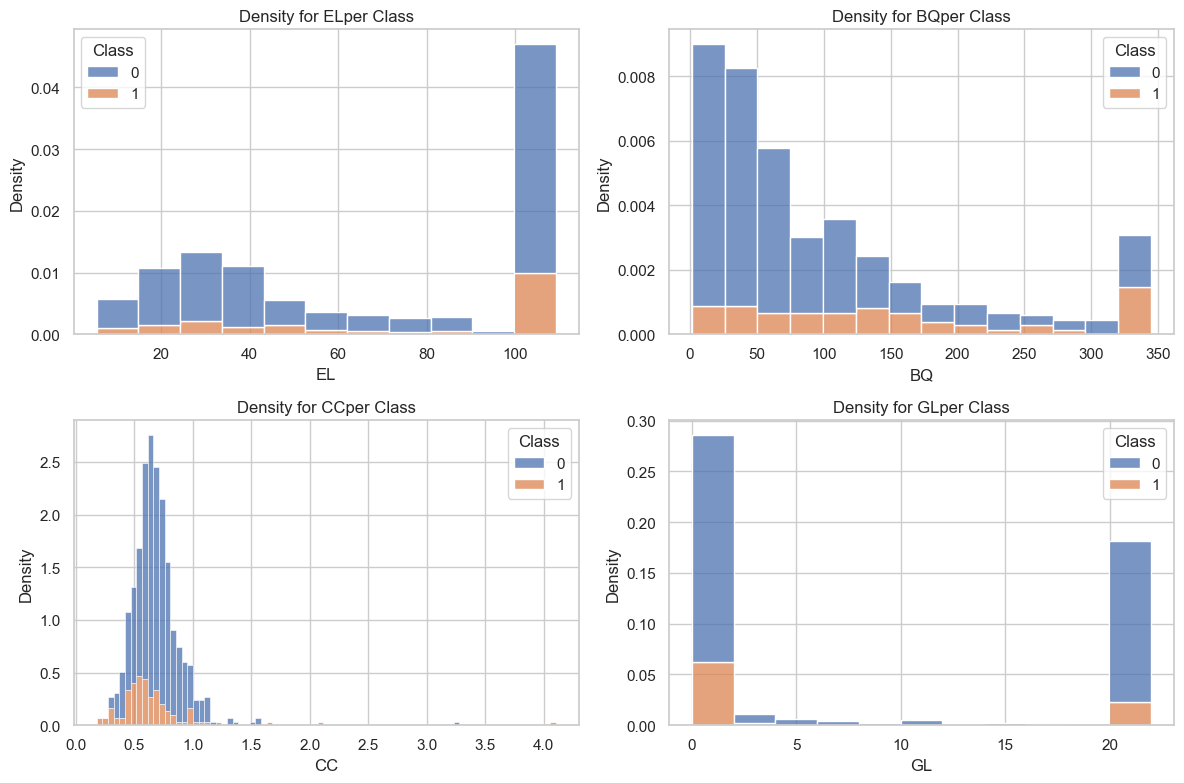

In [22]:
group = ['EL','BQ','CC','GL']
fig, axes = plt.subplots(2,2, sharey = False, sharex = False, figsize = (12,8))
for i in range(len(group)):
    col = i%2
    row = i//2
    sns.histplot(data=train, hue = "Class", x = group[i], ax=axes[row,col], multiple="stack", stat="density").set(title="Density for "+group[i]+"per Class")
    plt.tight_layout()

#### 2.4. Imputation of missing entries <a name = "imputation"></a>

In [23]:
# Function for imputing missing values with min per feature
def impute_min(df):
    df = df.copy()
    missing_cols = (df.isna().sum(axis=0) > 0) + 0
    missing_cols = missing_cols[missing_cols>=1]
    missing_cols = pd.DataFrame(missing_cols)
    
    imputed = (df.isna().sum(axis=1) > 0) + 0
    df["imputed"] = imputed
    
    for i in missing_cols.index:
        df[i] = df[i].fillna(np.min(df[i]))
    
    return df

# Function for imputing missing values with max per feature
def impute_max(df):
    df = df.copy()
    missing_cols = (df.isna().sum(axis=0) > 0) + 0
    missing_cols = missing_cols[missing_cols>=1]
    missing_cols = pd.DataFrame(missing_cols)
    
    imputed = (df.isna().sum(axis=1) > 0) + 0
    df["imputed"] = imputed
    
    for i in missing_cols.index:
        df[i] = df[i].fillna(np.max(df[i]))
    
    return df

In [24]:
# Imputing mins
train_imp_min = impute_min(train)
test_imp_min = impute_min(test)

# Imputing max
train_imp_max = impute_max(train)
test_imp_max = impute_max(test)

In [25]:
train_imp_max.imputed.sum()

69

Imputing with max

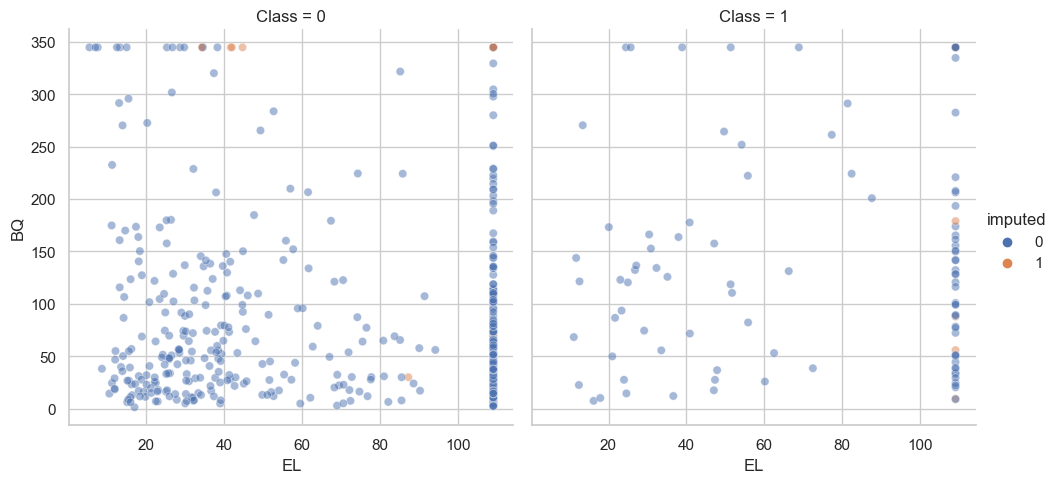

In [26]:
sns.relplot(data=train_imp_max, x="EL", y="BQ", hue = "imputed", kind="scatter", col="Class", alpha=0.5)

Imputing with min

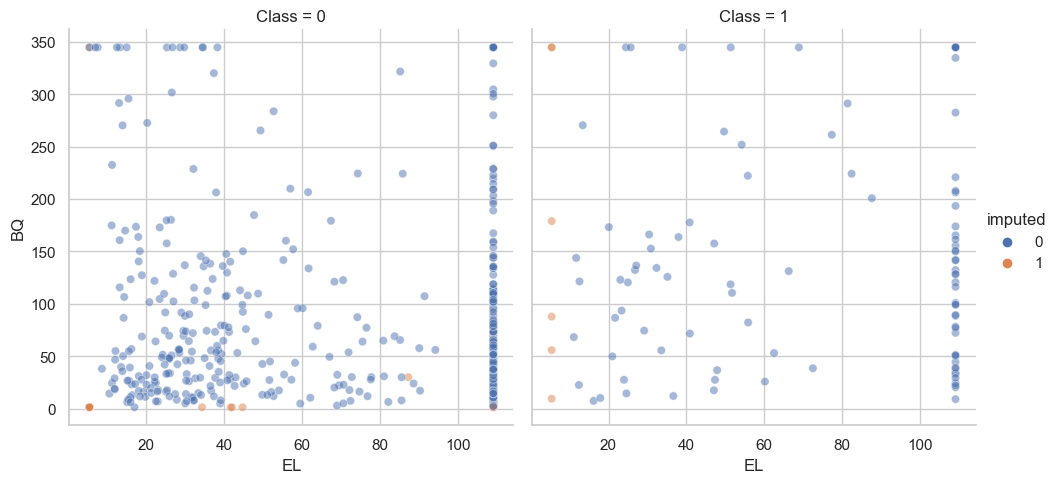

In [27]:
sns.relplot(data=train_imp_min, x="EL", y="BQ", hue = "imputed", kind="scatter", col="Class", alpha=0.5)

/opt/miniconda3/envs/dmc23/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 38.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/dmc23/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/dmc23/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/dmc23/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/dmc23/lib/python3.11/site-packa

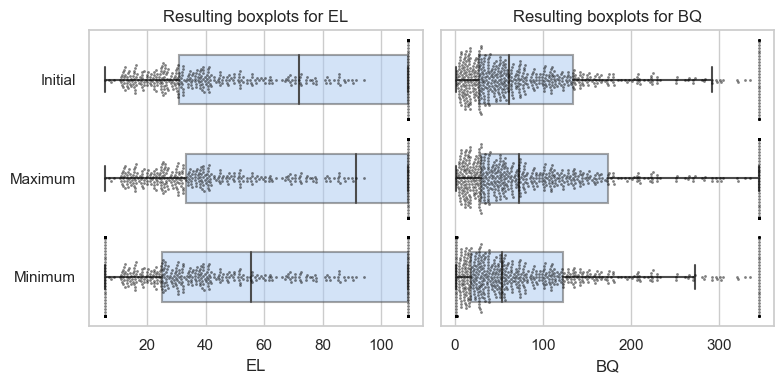

In [28]:
group = ['EL','BQ']
fig, axes = plt.subplots(1,2, sharey = True, sharex = False, figsize = (8,4))
for i in range(len(group)):
    init = pd.DataFrame(train[group[i]]).reset_index().drop(columns=["Id"]).assign(Origin="Initial")
    maxi = pd.DataFrame(train_imp_max[group[i]]).reset_index().drop(columns=["Id"]).assign(Origin="Maximum")
    mini = pd.DataFrame(train_imp_min[group[i]]).reset_index().drop(columns=["Id"]).assign(Origin="Minimum")
    cdf = pd.concat([init, maxi, mini], ignore_index=True)
    #col = i%2
    #row = i//2
    
    sns.boxplot(data = cdf, x = group[i], y = "Origin", width=0.5, boxprops={"alpha": 0.5, "facecolor": "#A9C8F0"},#boxprops={"facecolor": "#A9C8F0"}, 
                ax=axes[i], showfliers = False).set(title="Resulting boxplots for "+group[i], ylabel=None)
    #sns.stripplot(data = cdf, x = group[i], y = "Origin", alpha = 0.1, linewidth=0.5, size=2, 
    #              color="black", ax=axes[col,row]).set(title="Resulting boxplots for "+group[i], ylabel=None)
    sns.swarmplot(data = cdf, x = group[i], y = "Origin", color = "black", alpha = 0.5, size=2, ax=axes[i]).set(title="Resulting boxplots for "+group[i], ylabel=None)
    
    plt.tight_layout()

[Back to top](#table-of-contents)

### 3. Loss Analysis

Balanced Log-Loss

In [29]:
def balanced_log_loss(mod, X, y_true):
    
    y_pred = mod.predict_proba(X)
    
    p0 = y_pred[:,0]
    p1 = y_pred[:,1]
        
    bound = 1e-15
    p0 = np.clip(p0, bound, 1-bound)
    p1 = np.clip(p1, bound, 1-bound)
    
    y_0 = (y_true==0)+0
    y_1 = (y_true==1)+0
    
    N_1 = bound if sum(y_true) == 0 else sum(y_true)
    N_0 = len(y_true) - N_1
    N_0 = bound if N_0 == 0 else N_0
    sum_0 = sum(np.multiply(y_0,np.log(p0)))
    sum_1 = sum(np.multiply(y_1,np.log(p1)))
    blg = ((-sum_0/N_0)+(-sum_1/N_1))/2
    
    return blg


In [30]:
# Balanced loss for testing purposes
def balanced_log_loss_test(y_pred, y_true):
    
    #y_pred = mod.predict_proba(X)
    
    p0 = 1-y_pred
    p1 = y_pred
        
    bound = 1e-15
    p0 = np.clip(p0, bound, 1-bound)
    p1 = np.clip(p1, bound, 1-bound)
    
    y_0 = (y_true==0)+0
    y_1 = (y_true==1)+0
    
    N_1 = bound if sum(y_true) == 0 else sum(y_true)
    N_0 = len(y_true) - N_1
    N_0 = bound if N_0 == 0 else N_0
    sum_0 = sum(np.multiply(y_0,np.log(p0)))
    sum_1 = sum(np.multiply(y_1,np.log(p1)))
    blg = ((-sum_0/N_0)+(-sum_1/N_1))/2
    
    return blg

In [31]:
y_true = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1])*0.5
balanced_log_loss_test(y_pred, y_true)

0.6931471805599453

In [32]:
y_true = np.array([0,0,0,0,0,0,0,0,0,0,0,1])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1])*0.2
balanced_log_loss_test(y_pred, y_true)

0.916290731874155

In [33]:
y_true = np.array([0,0,0,0,0,0,0,0,0,0,0,0])
y_pred = np.array([1,1,1,1,1,1,1,1,1,1,1,1])*1
balanced_log_loss_test(y_pred, y_true)

17.26938819745534

(0.0, 2.0)

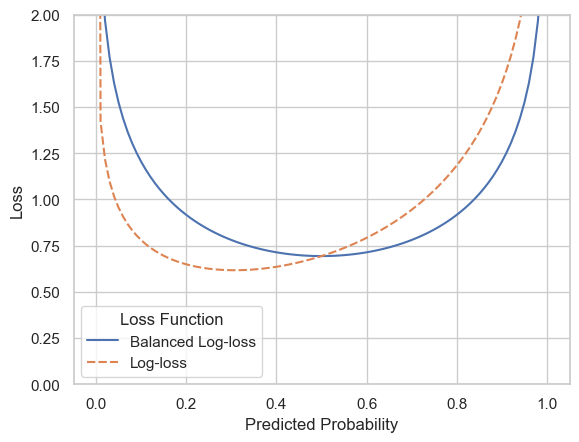

In [34]:
bal_ll = np.zeros(101)
ll = np.zeros(101)
for i in range(101):
    y_true = np.zeros(101)
    y_true[70:] = 1
    y_pred = np.repeat(1,101)*(i/100)
    ll[i] = metrics.log_loss(y_pred=y_pred, y_true=y_true, eps = 1e-15, labels=[1,0])
    bal_ll[i] = balanced_log_loss_test(y_pred, y_true)

probs = np.arange(0,1.01,0.01)
df1 = pd.DataFrame({"Predicted Probability":probs,"Loss":bal_ll, "Loss Function":np.repeat("Balanced Log-loss",101)})#,"Log-loss":ll})
df2 = pd.DataFrame({"Predicted Probability":probs,"Loss":ll, "Loss Function":np.repeat("Log-loss",101)})#,"Log-loss":ll})
df_plot = pd.concat([df1,df2])
sns.lineplot(data=df_plot, x = "Predicted Probability", y = "Loss", hue="Loss Function", style="Loss Function")#.set(title="Loss comparison for an unbalanced dataset (30%-70%)")
plt.ylim(0,2)

(0.0, 2.0)

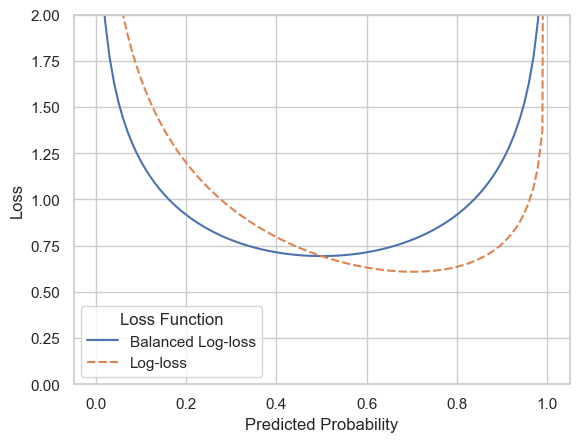

In [35]:
bal_ll = np.zeros(101)
ll = np.zeros(101)
for i in range(101):
    y_true = np.zeros(101)
    y_true[30:] = 1
    y_pred = np.repeat(1,101)*(i/100)
    ll[i] = metrics.log_loss(y_pred=y_pred, y_true=y_true, eps = 1e-15, labels=[1,0])
    bal_ll[i] = balanced_log_loss_test(y_pred, y_true)

probs = np.arange(0,1.01,0.01)
df1 = pd.DataFrame({"Predicted Probability":probs,"Loss":bal_ll, "Loss Function":np.repeat("Balanced Log-loss",101)})#,"Log-loss":ll})
df2 = pd.DataFrame({"Predicted Probability":probs,"Loss":ll, "Loss Function":np.repeat("Log-loss",101)})#,"Log-loss":ll})
df_plot = pd.concat([df1,df2])
sns.lineplot(data=df_plot, x = "Predicted Probability", y = "Loss", hue="Loss Function", style="Loss Function")#.set(title="Loss comparison for an unbalanced dataset (30%-70%)")
plt.ylim(0,2)
    
    

(0.0, 2.0)

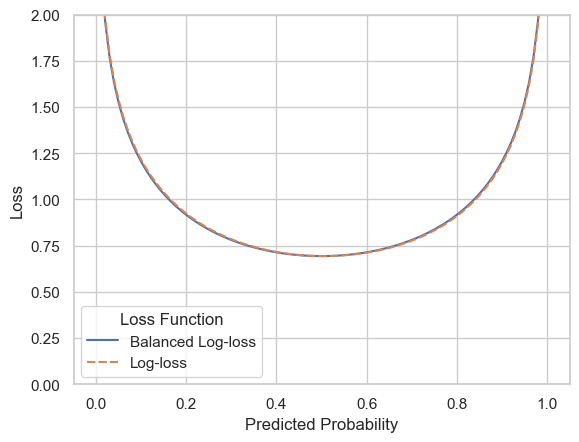

In [36]:
bal_ll = np.zeros(101)
ll = np.zeros(101)
for i in range(101):
    y_true = np.zeros(101)
    y_true[50:] = 1
    y_pred = np.repeat(1,101)*(i/100)
    ll[i] = metrics.log_loss(y_pred=y_pred, y_true=y_true, eps = 1e-15, labels=[1,0])
    bal_ll[i] = balanced_log_loss_test(y_pred, y_true)

probs = np.arange(0,1.01,0.01)
df1 = pd.DataFrame({"Predicted Probability":probs,"Loss":bal_ll, "Loss Function":np.repeat("Balanced Log-loss",101)})#,"Log-loss":ll})
df2 = pd.DataFrame({"Predicted Probability":probs,"Loss":ll, "Loss Function":np.repeat("Log-loss",101)})#,"Log-loss":ll})
df_plot = pd.concat([df1,df2])
sns.lineplot(data=df_plot, x = "Predicted Probability", y = "Loss", hue="Loss Function", style="Loss Function")#.set(title="Loss comparison for an unbalanced dataset (30%-70%)")
plt.ylim(0,2)


### 4. ML Models

#### 4.1. Decision Trees

In [37]:
def my_cross_val_tree(X, y, randstate, cv, **kwargs):
    np.random.seed(randstate)
    rand_states = [randstate] #np.random.randint(0,100,1)
    losses = []
    
    for i in range(len(rand_states)):
        kf = KFold(n_splits=cv, random_state=rand_states[i], shuffle=True)
        for train, valid in kf.split(X):
            #kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'is_unbalance':True}
            mod = tree.DecisionTreeClassifier(**kwargs)
            X_train = X.iloc[train]
            y_train = y.iloc[train]
            mod.fit(X_train, y_train)
            losses.append(balanced_log_loss(mod, X.iloc[valid], y.iloc[valid]))
    return losses

#### Training with imputed dataset with maximum values.

In [38]:
# Imputed dataset with max
X = train_imp_max.drop(columns=["Class"])
y = train_imp_max["Class"]

parameters = {'max_depth': [1, 2, 3, 4, 5, 10, None],
              'min_samples_split': [2,3,4]
}

rstate = 77
cv = 10
cols = ['max_depth','min_samples_split','losses', 'cv_loss']
my_grid = pd.DataFrame(columns = cols)
for i in range(len(parameters['max_depth'])):
    for j in range(len(parameters['min_samples_split'])):
        kwargs = {'max_depth': parameters['max_depth'][i], 'min_samples_split': parameters['min_samples_split'][j], 'class_weight':{0:108, 1:509}}
        losses = my_cross_val_tree(X=X, y=y, randstate=rstate, cv=cv, **kwargs)
        avg_loss = np.mean(losses)
        df = pd.DataFrame( [ [parameters['max_depth'][i], parameters['min_samples_split'][j], np.round(losses,4), avg_loss] ] , columns = cols)
        my_grid = pd.concat([my_grid, df], axis=0)
        if avg_loss <= min(my_grid.cv_loss):
            print(kwargs)
            best_mod_tree = tree.DecisionTreeClassifier(**kwargs)
            best_mod_tree = best_mod_tree.fit(X,y)
        
my_grid.sort_values(by=["cv_loss"], ascending=True)            

{'max_depth': 1, 'min_samples_split': 2, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'min_samples_split': 3, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'min_samples_split': 4, 'class_weight': {0: 108, 1: 509}}


,max_depth,min_samples_split,losses,cv_loss
0,1,2,"[0.4906, 0.6791, 0.4908, 0.4758, 0.5198, 0.565...",0.559265
0,1,3,"[0.4906, 0.6791, 0.4908, 0.4758, 0.5198, 0.565...",0.559265
0,1,4,"[0.4906, 0.6791, 0.4908, 0.4758, 0.5198, 0.565...",0.559265
0,2,2,"[2.9234, 0.3748, 0.3133, 0.4747, 1.869, 0.5599...",0.855478
0,2,3,"[2.9234, 0.3748, 0.3133, 0.4747, 1.869, 0.5599...",0.855478
0,2,4,"[2.9234, 0.3748, 0.3133, 0.4747, 1.869, 0.5599...",0.855478
0,3,2,"[2.9483, 0.3187, 0.2707, 0.352, 1.9308, 0.4316...",1.474988
0,3,3,"[2.9483, 0.3187, 0.2707, 0.352, 1.9308, 0.4316...",1.474988
0,3,4,"[2.9483, 0.3187, 0.2707, 0.352, 1.9308, 0.4316...",1.474988
0,4,4,"[2.987, 2.1613, 3.8133, 0.3953, 5.1056, 2.3395...",2.588011


[Text(0.5, 0.75, 'DU <= 2.29\ngini = 0.5\nsamples = 617\nvalue = [54972, 54972]\nclass = y[0]'),
 Text(0.25, 0.25, 'gini = 0.443\nsamples = 526\nvalue = [51408, 25450]\nclass = y[0]'),
 Text(0.75, 0.25, 'gini = 0.192\nsamples = 91\nvalue = [3564, 29522]\nclass = y[1]')]

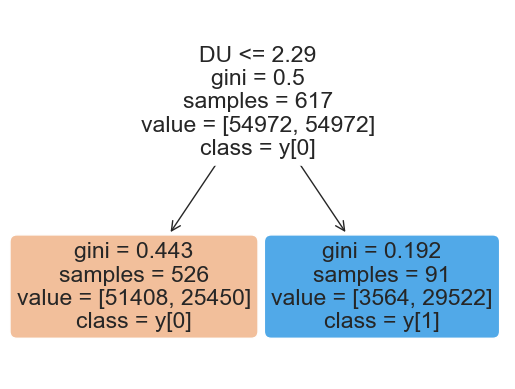

In [40]:
tree.plot_tree(best_mod_tree, feature_names=train_imp_max.columns, filled = True,
               class_names=True, rounded=True)

Confusion Matrix

[Text(0.5, 0.24999999999999467, 'Predicted Label'),
 Text(4.750000000000002, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix for the Decision Tree')]

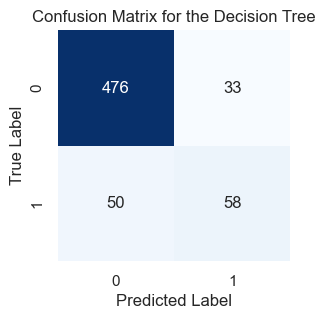

In [41]:
plt.figure(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y, best_mod_tree.predict(X), labels=best_mod_tree.classes_, ), 
            cmap="Blues", annot=True, fmt='', cbar=False)
ax.set(xlabel="Predicted Label", ylabel="True Label", title="Confusion Matrix for the Decision Tree")

#### Now training it with the dataset imputed with Minimum Values.

In [44]:
# Imputed dataset with min
X = train_imp_min.drop(columns=["Class"])
y = train_imp_min["Class"]

parameters = {'max_depth': [1, 2, 3, 4, 5, 10, None],
              'min_samples_split': [2,3,4]
}

rstate = 77
cv = 10
cols = ['max_depth','min_samples_split','losses', 'cv_loss']
my_grid = pd.DataFrame(columns = cols)
for i in range(len(parameters['max_depth'])):
    for j in range(len(parameters['min_samples_split'])):
        kwargs = {'max_depth': parameters['max_depth'][i], 'min_samples_split': parameters['min_samples_split'][j], 'class_weight':{0:108, 1:509}}
        losses = my_cross_val_tree(X=X, y=y, randstate=rstate, cv=cv, **kwargs)
        avg_loss = np.mean(losses)
        df = pd.DataFrame( [ [parameters['max_depth'][i], parameters['min_samples_split'][j], np.round(losses,4), avg_loss] ] , columns = cols)
        my_grid = pd.concat([my_grid, df], axis=0)
        if avg_loss <= min(my_grid.cv_loss):
            print(kwargs)
            best_mod_tree = tree.DecisionTreeClassifier(**kwargs)
            best_mod_tree = best_mod_tree.fit(X,y)
        
my_grid.sort_values(by=["cv_loss"], ascending=True)                 

{'max_depth': 1, 'min_samples_split': 2, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'min_samples_split': 3, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'min_samples_split': 4, 'class_weight': {0: 108, 1: 509}}


,max_depth,min_samples_split,losses,cv_loss
0,1,2,"[0.4896, 0.6798, 0.4902, 0.4758, 0.5193, 0.566...",0.557598
0,1,3,"[0.4896, 0.6798, 0.4902, 0.4758, 0.5193, 0.566...",0.557598
0,1,4,"[0.4896, 0.6798, 0.4902, 0.4758, 0.5193, 0.566...",0.557598
0,2,2,"[2.9236, 0.3763, 0.3128, 0.4724, 1.8693, 0.560...",0.845804
0,2,3,"[2.9236, 0.3763, 0.3128, 0.4724, 1.8693, 0.560...",0.845804
0,2,4,"[2.9236, 0.3763, 0.3128, 0.4724, 1.8693, 0.560...",0.845804
0,3,2,"[2.9493, 0.3295, 0.29, 0.483, 1.9318, 0.6059, ...",1.189279
0,3,3,"[2.9493, 0.3295, 0.29, 0.483, 1.9318, 0.6059, ...",1.189279
0,3,4,"[2.9493, 0.3295, 0.29, 0.483, 1.9318, 0.6059, ...",1.189279
0,4,4,"[2.8838, 1.8461, 3.8666, 1.685, 5.103, 2.167, ...",2.458730


tree.plot_tree(best_mod_tree, feature_names=train_imp.columns, filled = True,
               class_names=True, rounded=True)

Confusion Matrix

[Text(0.5, 0.24999999999999467, 'Predicted Label'),
 Text(4.750000000000002, 0.5, 'True Label')]

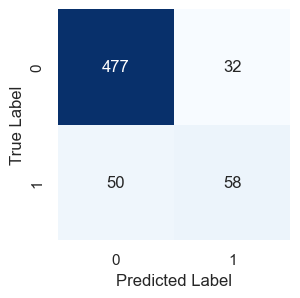

In [45]:
plt.figure(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y, best_mod_tree.predict(X), labels=best_mod_tree.classes_, ), 
            cmap="Blues", annot=True, fmt='', cbar=False)
ax.set(xlabel="Predicted Label", ylabel="True Label")#, title="Confusion Matrix for the Decision Tree", )

#### 4.2. Random Forests

In [46]:
def my_cross_val_rf(X, y, randstate, cv, **kwargs):
    np.random.seed(randstate)
    rand_states = [randstate] #np.random.randint(0,100,1)
    losses = []
    
    for i in range(len(rand_states)):
        kf = KFold(n_splits=cv, random_state=rand_states[i], shuffle=True)
        for train, valid in kf.split(X):
            #kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'is_unbalance':True}
            mod = RandomForestClassifier(**kwargs)
            X_train = X.iloc[train]
            y_train = y.iloc[train]
            mod.fit(X_train, y_train)
            losses.append(balanced_log_loss(mod, X.iloc[valid], y.iloc[valid]))
    return losses

#### Training with Maximum Imputation Strategy

In [47]:
X = train_imp_max.drop(columns=["Class"])
y = train_imp_max["Class"]

parameters = {'max_depth': [1, 2, 3, 4, 5, 10, None],
              'n_estimators': [50, 100, 500, 1000]
}

rstate = 77
cv = 10
cols = ['max_depth','n_estimators','losses', 'cv_loss']
my_grid = pd.DataFrame(columns = cols)
for i in range(len(parameters['max_depth'])):
    for j in range(len(parameters['n_estimators'])):
        kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'class_weight':{0:108, 1:509}}
        losses = my_cross_val_rf(X=X, y=y, randstate=rstate, cv=cv, **kwargs)
        avg_loss = np.mean(losses)
        df = pd.DataFrame( [ [parameters['max_depth'][i], parameters['n_estimators'][j], np.round(losses,4), avg_loss] ] , columns = cols)
        my_grid = pd.concat([my_grid, df], axis=0)
        if avg_loss <= min(my_grid.cv_loss):
            print(kwargs)
            best_mod_rf = RandomForestClassifier(**kwargs)
            best_mod_rf = best_mod_rf.fit(X,y)
        
my_grid.sort_values(by=["cv_loss"], ascending=True)                 

{'max_depth': 1, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 2, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 2, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 3, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 3, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 4, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 4, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 4, 'n_estimators': 1000, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 5, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 5, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 5, 'n_estimators': 1000, 'class_weight': {0: 108, 1: 509}}


,max_depth,n_estimators,losses,cv_loss
0,5,1000,"[0.4153, 0.396, 0.3019, 0.3953, 0.46, 0.4418, ...",0.414023
0,5,500,"[0.4215, 0.3905, 0.2946, 0.4035, 0.4686, 0.451...",0.414507
0,5,100,"[0.4305, 0.402, 0.3167, 0.3806, 0.4539, 0.4344...",0.416952
0,4,1000,"[0.4125, 0.4055, 0.32, 0.3971, 0.4522, 0.4482,...",0.417839
0,4,500,"[0.4183, 0.3964, 0.3111, 0.4043, 0.4462, 0.453...",0.418056
0,4,50,"[0.4285, 0.4045, 0.3065, 0.4044, 0.4854, 0.439...",0.419361
0,5,50,"[0.4353, 0.4135, 0.2888, 0.4353, 0.4656, 0.444...",0.423660
0,4,100,"[0.4166, 0.4175, 0.3353, 0.4022, 0.4488, 0.447...",0.424216
0,3,100,"[0.4399, 0.4388, 0.3391, 0.4173, 0.4567, 0.470...",0.439836
0,3,500,"[0.4431, 0.4279, 0.3475, 0.427, 0.4574, 0.4733...",0.440833


Confusion Matrix

[Text(0.5, 0.24999999999999467, 'Predicted Label'),
 Text(4.750000000000002, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix for the Random Forests')]

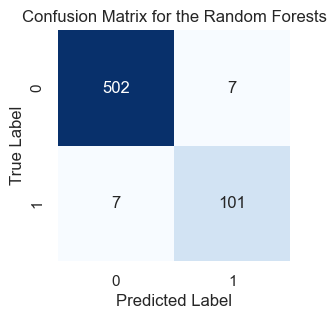

In [48]:
plt.figure(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y, best_mod_rf.predict(X), labels=best_mod_rf.classes_, ), 
            cmap="Blues", annot=True, fmt='', cbar=False)
ax.set(xlabel="Predicted Label", ylabel="True Label", title="Confusion Matrix for the Random Forests")

Features Importance

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12')])

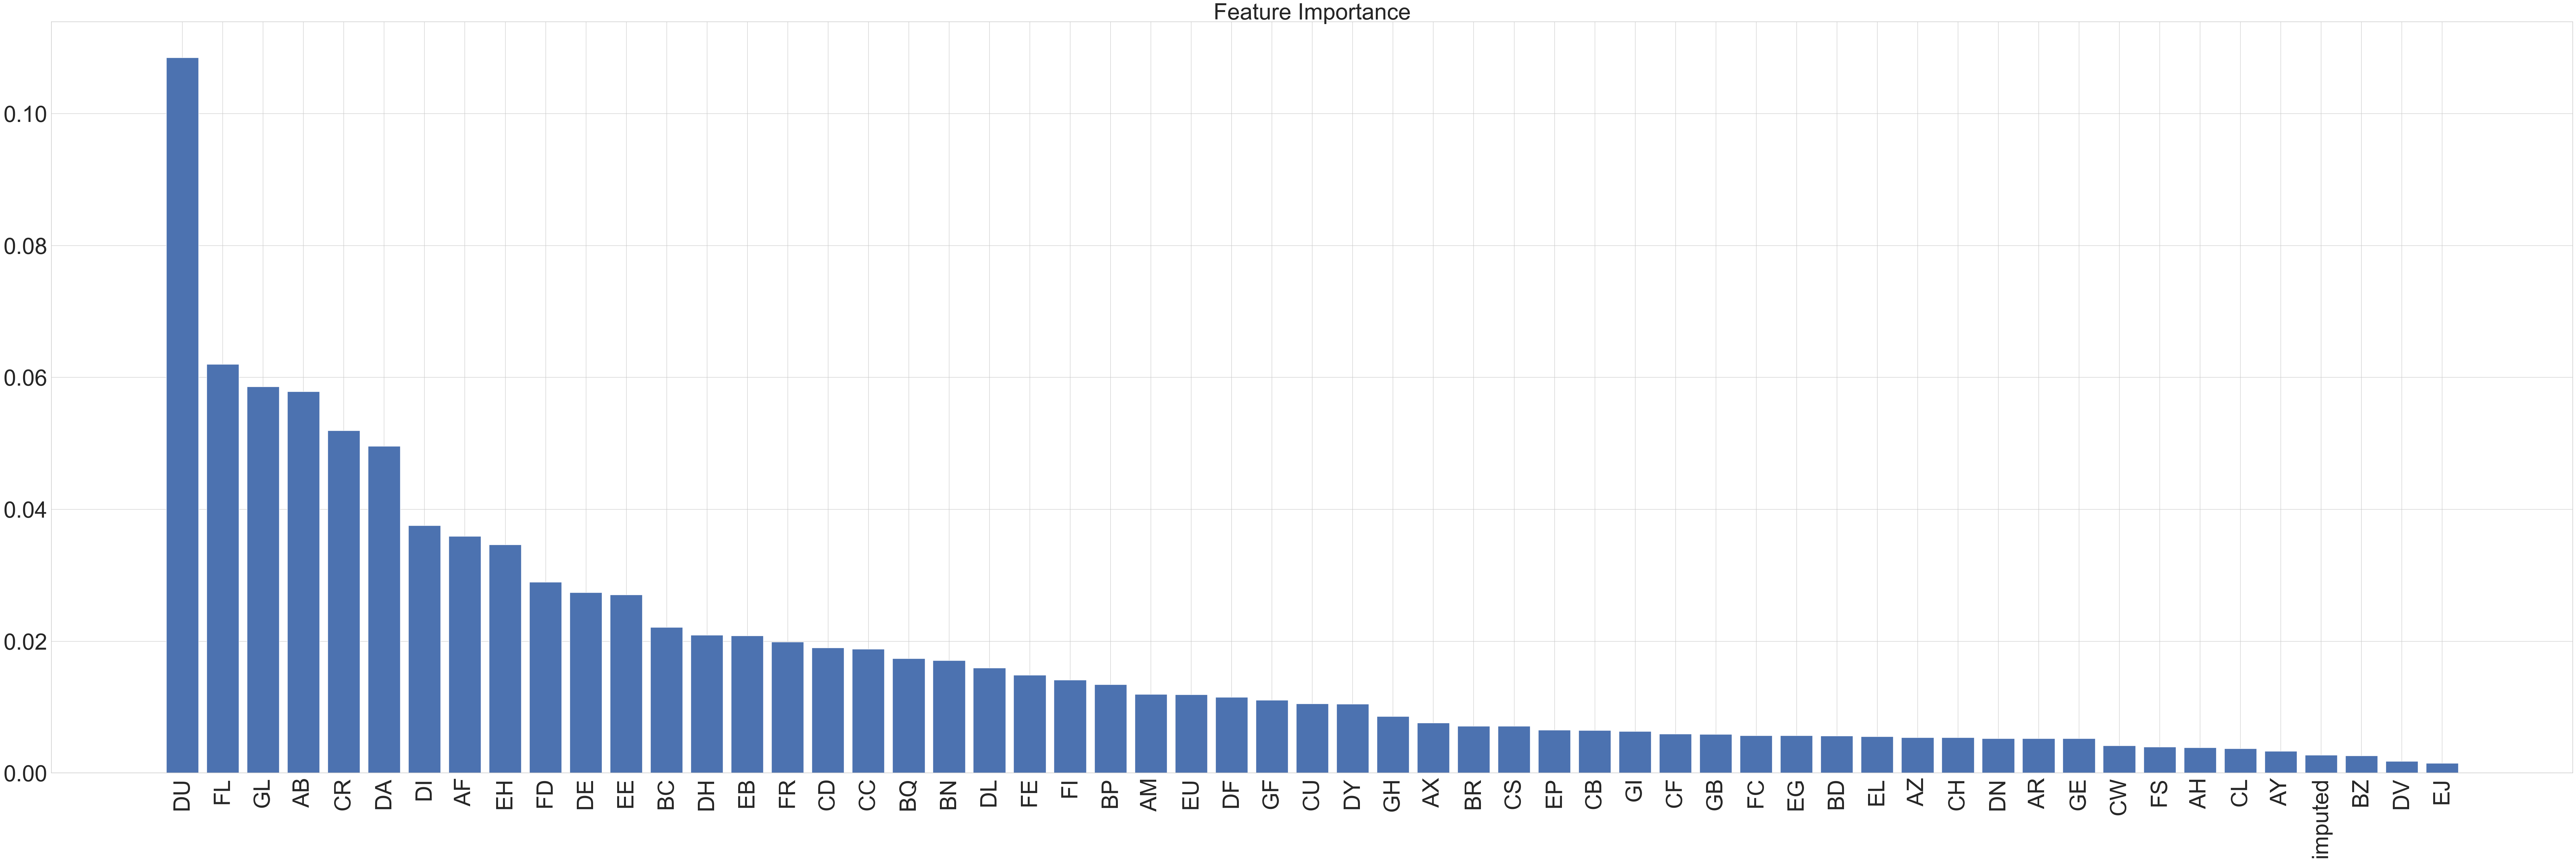

In [49]:
importances = best_mod_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(100,30))

# Create plot title
plt.title("Feature Importance", fontsize=50)

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize=50)
plt.yticks(fontsize=50)

#### Training with Minimum Imputation Strategy

In [50]:
X = train_imp_min.drop(columns=["Class"])
y = train_imp_min["Class"]

parameters = {'max_depth': [1, 2, 3, 4, 5, 10, None],
              'n_estimators': [50, 100, 500, 1000]
}

rstate = 77
cv = 10
cols = ['max_depth','n_estimators','losses', 'cv_loss']
my_grid = pd.DataFrame(columns = cols)
for i in range(len(parameters['max_depth'])):
    for j in range(len(parameters['n_estimators'])):
        kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'class_weight':{0:108, 1:509}}
        losses = my_cross_val_rf(X=X, y=y, randstate=rstate, cv=cv, **kwargs)
        avg_loss = np.mean(losses)
        df = pd.DataFrame( [ [parameters['max_depth'][i], parameters['n_estimators'][j], np.round(losses,4), avg_loss] ] , columns = cols)
        my_grid = pd.concat([my_grid, df], axis=0)
        if avg_loss <= min(my_grid.cv_loss):
            print(kwargs)
            best_mod_rf = RandomForestClassifier(**kwargs)
            best_mod_rf = best_mod_rf.fit(X,y)
        
my_grid.sort_values(by=["cv_loss"], ascending=True)     

{'max_depth': 1, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 1, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 2, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 2, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 3, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 3, 'n_estimators': 100, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 3, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 4, 'n_estimators': 50, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 4, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 5, 'n_estimators': 500, 'class_weight': {0: 108, 1: 509}}
{'max_depth': 5, 'n_estimators': 1000, 'class_weight': {0: 108, 1: 509}}


,max_depth,n_estimators,losses,cv_loss
0,5,1000,"[0.425, 0.3919, 0.2977, 0.388, 0.4364, 0.4176,...",0.404480
0,5,500,"[0.4282, 0.3847, 0.3118, 0.3987, 0.4524, 0.419...",0.407972
0,4,500,"[0.4289, 0.3939, 0.3116, 0.4001, 0.4353, 0.426...",0.408878
0,4,50,"[0.4325, 0.4013, 0.3138, 0.4014, 0.475, 0.4096...",0.408936
0,4,1000,"[0.424, 0.3984, 0.315, 0.3912, 0.4368, 0.426, ...",0.409606
0,5,100,"[0.4312, 0.4019, 0.329, 0.38, 0.434, 0.4223, 0...",0.412804
0,4,100,"[0.423, 0.3988, 0.3387, 0.4032, 0.4214, 0.4152...",0.413846
0,5,50,"[0.4333, 0.3975, 0.3057, 0.4221, 0.4504, 0.421...",0.419045
0,3,500,"[0.4519, 0.4236, 0.3403, 0.4208, 0.4433, 0.455...",0.431973
0,3,100,"[0.4461, 0.4319, 0.3387, 0.4136, 0.4363, 0.450...",0.432251


[Text(0.5, 0.24999999999999467, 'Predicted Label'),
 Text(4.750000000000002, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix for the Random Forests')]

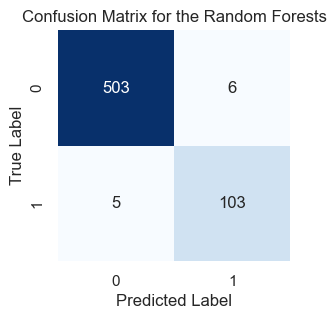

In [51]:
plt.figure(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y, best_mod_rf.predict(X), labels=best_mod_rf.classes_, ), 
            cmap="Blues", annot=True, fmt='', cbar=False)
ax.set(xlabel="Predicted Label", ylabel="True Label", title="Confusion Matrix for the Random Forests")

Features Importance

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12')])

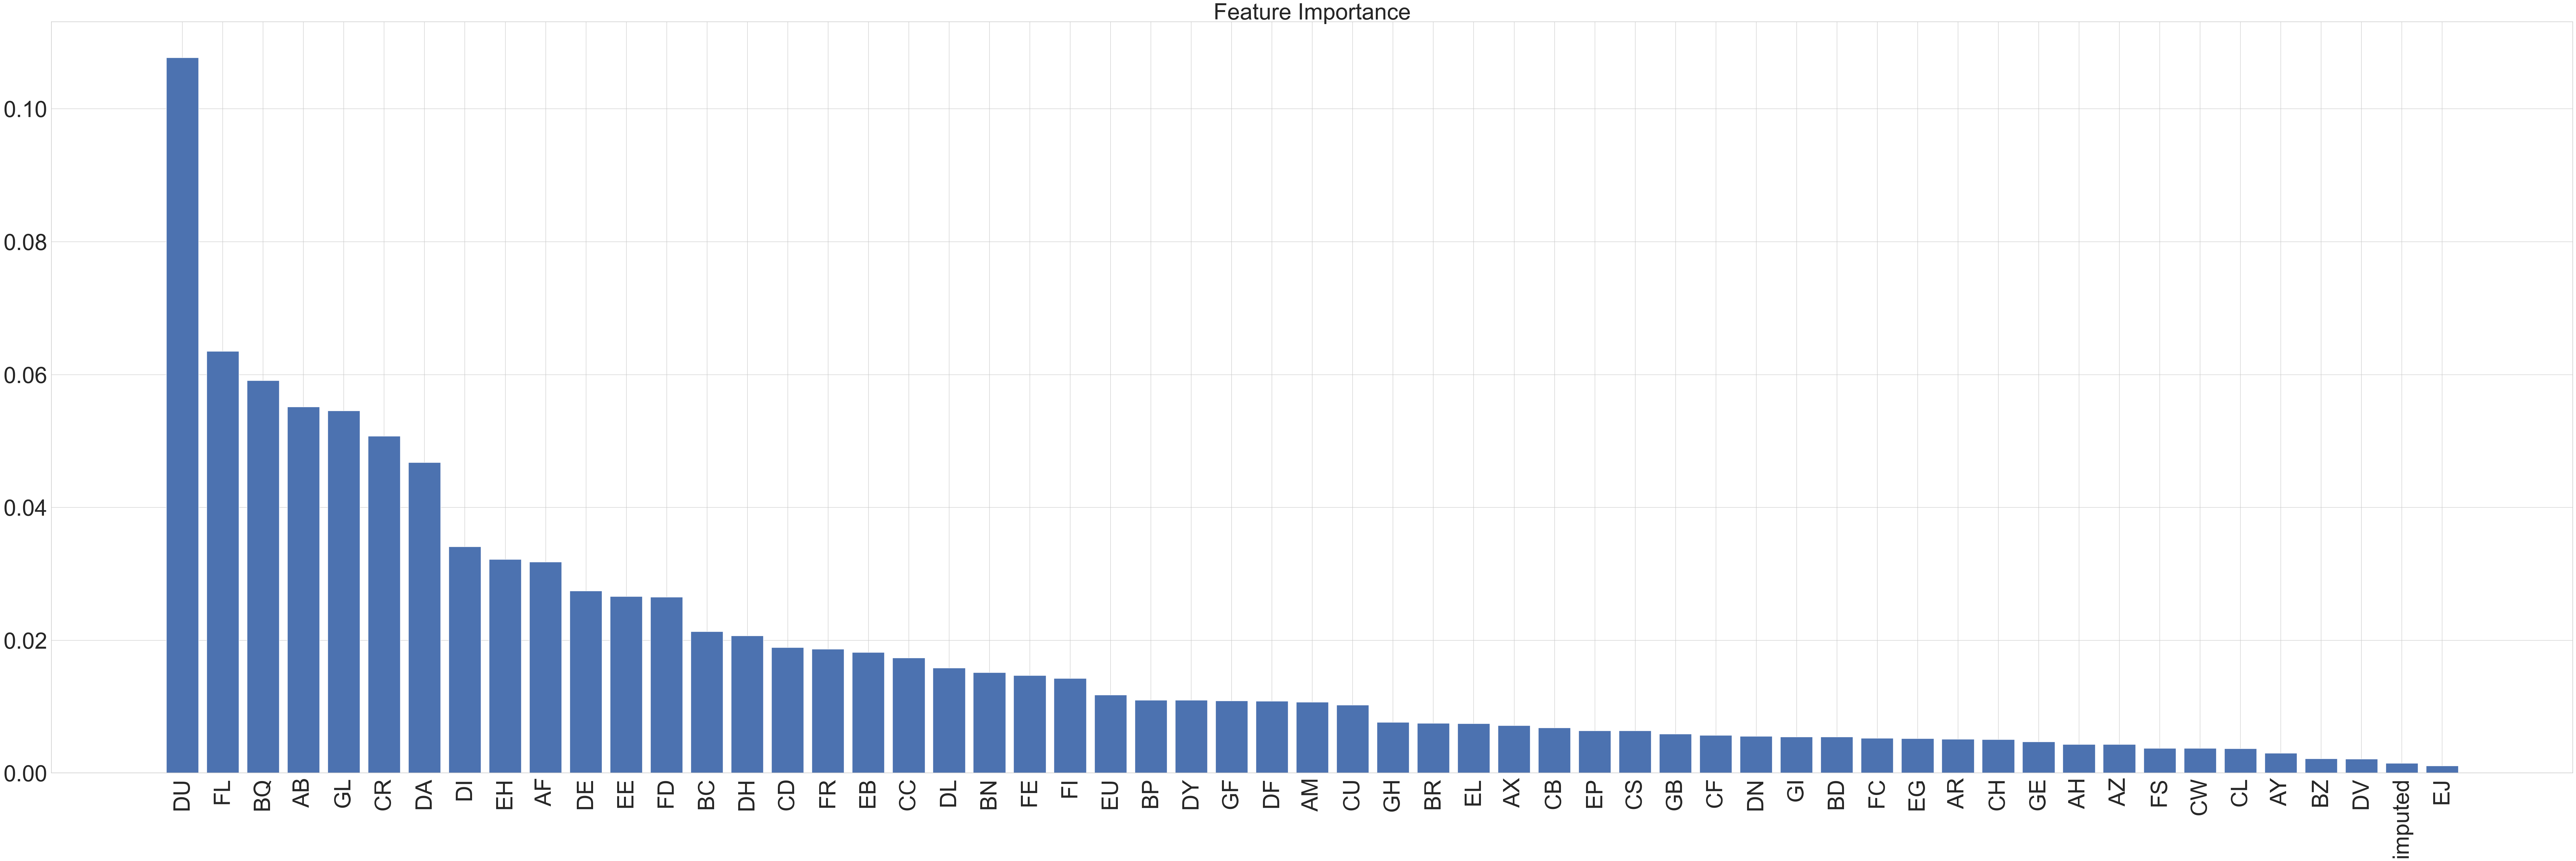

In [52]:
importances = best_mod_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(100,30))

# Create plot title
plt.title("Feature Importance", fontsize=50)

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize=50)
plt.yticks(fontsize=50)

#### 4.3. LightGBM

In [53]:
def my_cross_val_LGBM(X, y, randstate, cv, **kwargs):
    np.random.seed(randstate)
    rand_states = [randstate] #np.random.randint(0,100,1)
    losses = []
    
    for i in range(len(rand_states)):
        kf = KFold(n_splits=cv, random_state=rand_states[i], shuffle=True)
        for train, valid in kf.split(X):
            #kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'is_unbalance':True}
            lgbm_mod = lgbm.LGBMClassifier(**kwargs)
            X_train = X.iloc[train]
            y_train = y.iloc[train]
            lgbm_mod.fit(X_train, y_train)
            losses.append(balanced_log_loss(lgbm_mod, X.iloc[valid], y.iloc[valid]))
    return losses

In [54]:
dir_path = "/Users/romeroandres/Documents/6. TUD - SoSe 2023/Data Mining Cup/ICR/Data/"
sub_path = "/Users/romeroandres/Documents/6. TUD - SoSe 2023/Data Mining Cup/ICR/Predictions/"

train = pd.read_csv(dir_path+"train.csv", index_col="Id")
test = pd.read_csv(dir_path+"test.csv", index_col="Id")
greeks = pd.read_csv(dir_path+"greeks.csv", index_col="Id")

# Replacing in col EJ letter A for 0 and B for 1
train = train.replace({"A":0,"B":1})
test = test.replace({"A":0,"B":1})

X = train.drop(columns=["Class"])
y = train["Class"]

parameters = {'max_depth': [1, 2, 3, 4, 5, 10],
              'n_estimators': [100, 500, 1000],
              'is_unbalance': True
}

rstate = 77
cv = 10
cols = ['max_depth','n_estimators','losses', 'cv_loss']
my_grid = pd.DataFrame(columns = cols)
for i in range(len(parameters['max_depth'])):
    for j in range(len(parameters['n_estimators'])):
        kwargs = {'max_depth': parameters['max_depth'][i], 'n_estimators': parameters['n_estimators'][j], 'is_unbalance':True}
        losses = my_cross_val_LGBM(X=X, y=y, randstate=rstate, cv=cv, **kwargs)
        avg_loss = np.mean(losses)
        df = pd.DataFrame( [ [parameters['max_depth'][i], parameters['n_estimators'][j], np.round(losses,4), avg_loss] ] , columns = cols)
        my_grid = pd.concat([my_grid, df], axis=0)
        if avg_loss <= min(my_grid.cv_loss):
            print(kwargs)
            best_mod_lgbm = lgbm.LGBMClassifier(**kwargs)
            best_mod_lgbm = best_mod_lgbm.fit(X,y)
        
my_grid.sort_values(by=["cv_loss"], ascending=True)  

{'max_depth': 1, 'n_estimators': 100, 'is_unbalance': True}
{'max_depth': 1, 'n_estimators': 500, 'is_unbalance': True}
{'max_depth': 2, 'n_estimators': 100, 'is_unbalance': True}
{'max_depth': 3, 'n_estimators': 100, 'is_unbalance': True}


,max_depth,n_estimators,losses,cv_loss
0,3,100,"[0.3306, 0.203, 0.095, 0.1483, 0.2856, 0.2701,...",0.248631
0,4,100,"[0.3256, 0.1384, 0.0595, 0.1205, 0.3745, 0.308...",0.256858
0,2,100,"[0.3298, 0.2254, 0.1002, 0.173, 0.336, 0.303, ...",0.261654
0,5,100,"[0.3341, 0.1259, 0.0427, 0.1357, 0.4358, 0.366...",0.278017
0,1,500,"[0.2734, 0.3305, 0.0789, 0.1803, 0.4276, 0.272...",0.299395
0,2,500,"[0.3487, 0.367, 0.0167, 0.1982, 0.5897, 0.4007...",0.327902
0,10,100,"[0.509, 0.2882, 0.0367, 0.125, 0.4716, 0.4396,...",0.330125
0,1,100,"[0.379, 0.3895, 0.1986, 0.2742, 0.3662, 0.3628...",0.349603
0,1,1000,"[0.3583, 0.4433, 0.0416, 0.2427, 0.6062, 0.318...",0.368302
0,3,500,"[0.4246, 0.3881, 0.0195, 0.2334, 0.8122, 0.559...",0.448467


Confusion Matrix

[Text(0.5, 0.24999999999999467, 'Predicted Label'),
 Text(4.750000000000002, 0.5, 'True Label'),
 Text(0.5, 1.0, 'Confusion Matrix for the LightGBM')]

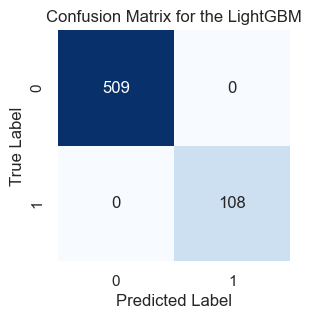

In [55]:
plt.figure(figsize = (3,3))
ax = sns.heatmap(confusion_matrix(y, best_mod_lgbm.predict(X), labels=best_mod_lgbm.classes_, ), 
            cmap="Blues", annot=True, fmt='', cbar=False)
ax.set(xlabel="Predicted Label", ylabel="True Label", title="Confusion Matrix for the LightGBM")

Features Importance

(array([ 0., 10., 20., 30., 40., 50.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50')])

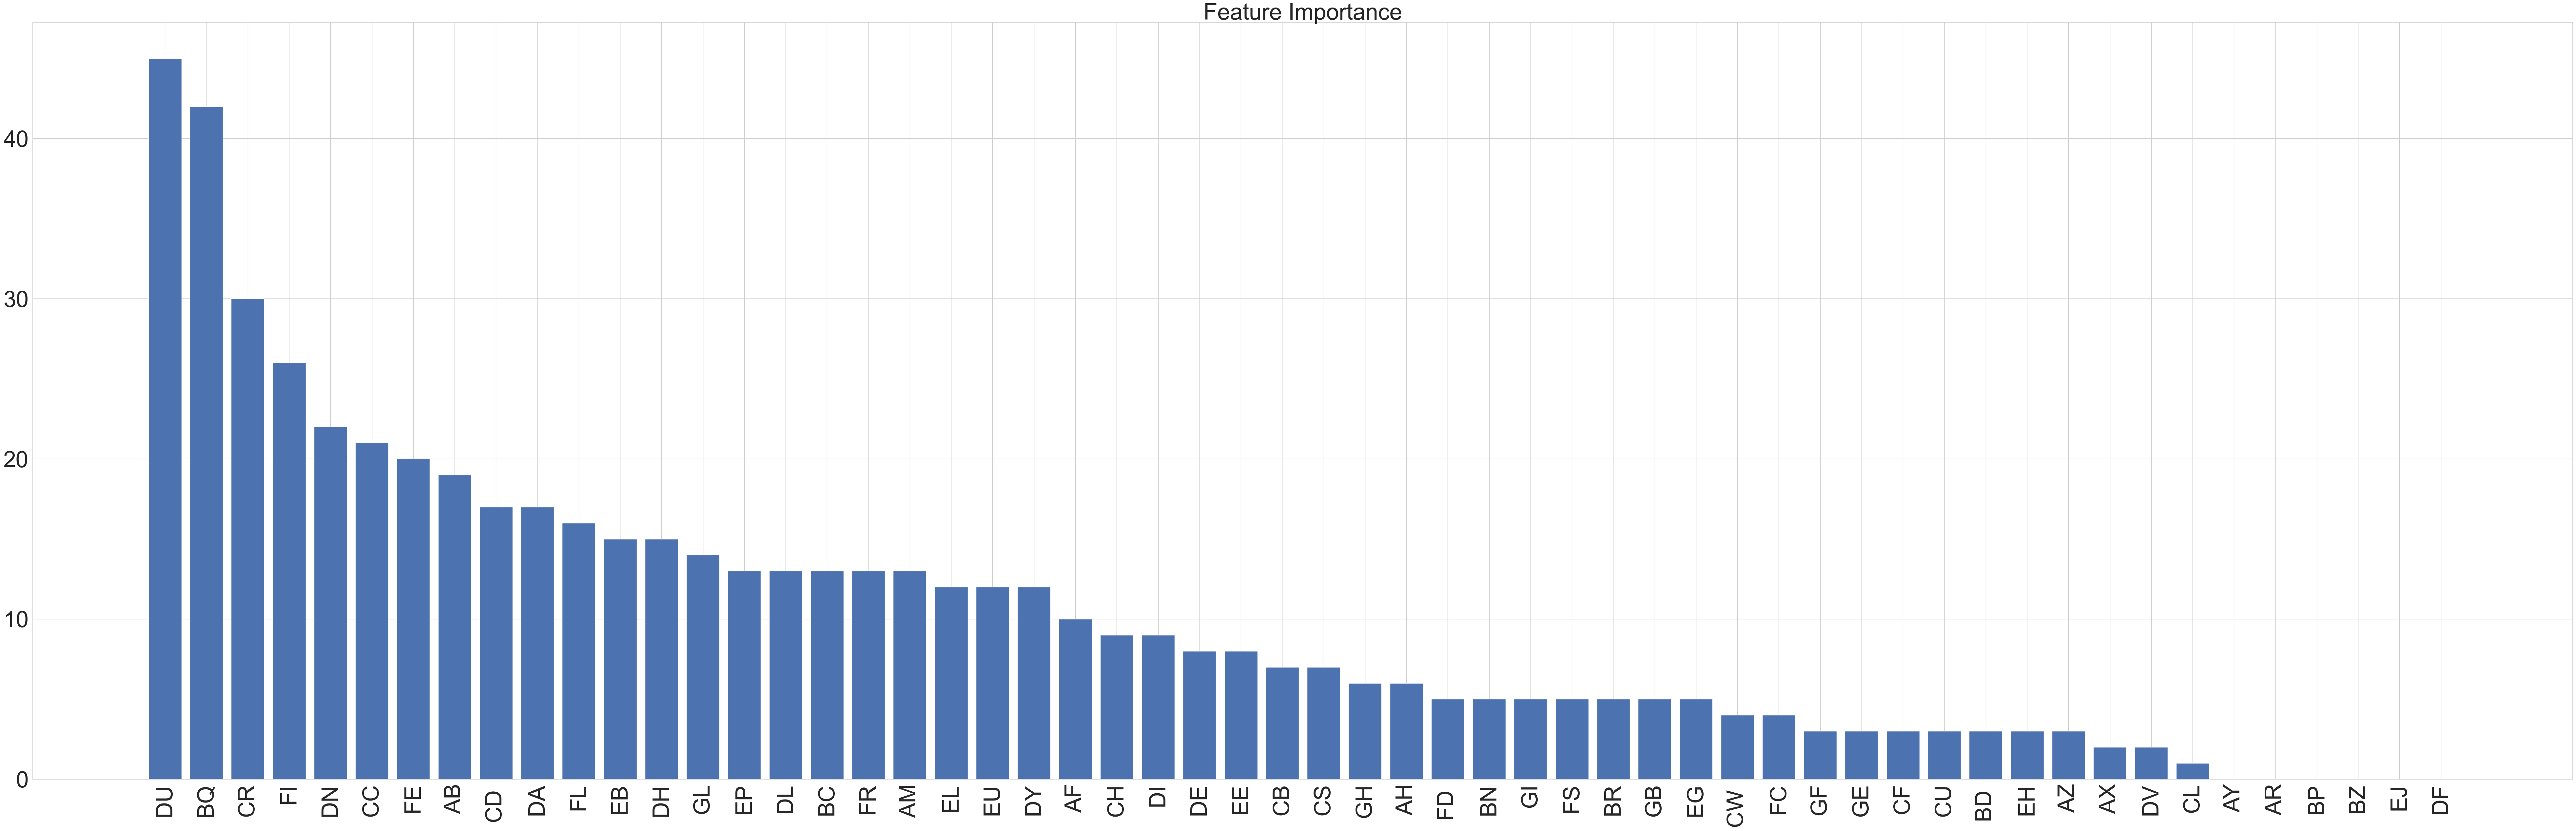

In [56]:
importances = best_mod_lgbm.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(100,30))

# Create plot title
plt.title("Feature Importance", fontsize=50)

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90, fontsize=50)
plt.yticks(fontsize=50)

### 5. Submission

In [58]:
#test = test.drop(columns = ["imputed"])
kf = KFold(n_splits=cv, random_state=rstate, shuffle=True)
preds = []
for train, valid in kf.split(X):
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    best_mod_lgbm.fit(X_train, y_train)
    pred = best_mod_lgbm.predict_proba(test) 
    preds.append(pred)

pred_f = sum(preds)/cv

test["class_0"] = pred_f[:,0]
test["class_1"] = pred_f[:,1]
submission = test[["class_0","class_1"]]
test = test.drop(columns=['class_0','class_1'])
submission.to_csv(sub_path+'submission.csv', index=True)
submission
                 

,class_0,class_1
Id,,
00eed32682bb,0.809815,0.190185
010ebe33f668,0.809815,0.190185
02fa521e1838,0.809815,0.190185
040e15f562a2,0.809815,0.190185
046e85c7cc7f,0.809815,0.190185
